<a href="https://colab.research.google.com/github/gonulsinem/1_Python_ML/blob/main/4_SVR_SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BTK Akademi- Python ile Makine Öğrenmesi Kursu calismalari ve kendi tuttuğum notlardan olusmaktadir.

Kursta verilen maaslar.csv veri seti kullanildi

# Destek vektor ile tahmin.


1.   Ilk kullanimi siniflandirma problemi. 
2.   max noktayi alabilen margin'i saglayan dogruyu sec
3.   margin araligi ne kadar kucukse o kadar degerli bir dogrudur.




In [1]:
#kutuphaneler import edildi.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/maaslar.csv')
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [5]:
x = data.iloc[:,1:2]
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [7]:
y = data.iloc[:,2:]
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


In [10]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)#x'ten Y'yi lineer olarak fit etmel

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
X = x.values
Y = y.values
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


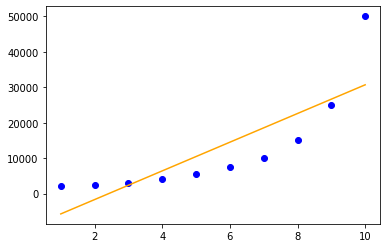

In [13]:
plt.scatter(X,Y, color='blue')
plt.plot(X,lin_reg.predict(X),color = 'orange')

Polinomal Regresyon

In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(X)
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [15]:
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

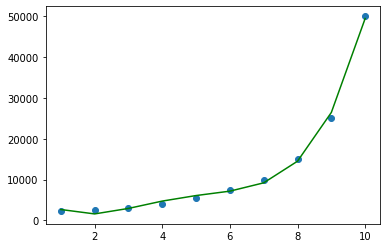

In [17]:
plt.scatter(X,Y)
plt.plot(X, lin_reg2.predict(x_poly), color='green')

In [21]:
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_scaler = sc1.fit_transform(X)

sc2 = StandardScaler()
y_scaler = sc2.fit_transform(Y)

In [24]:
from sklearn.svm import SVR

svr_reg = SVR(kernel = 'rbf') #kernel degeri degisebilir
svr_reg.fit(x_scaler, y_scaler)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

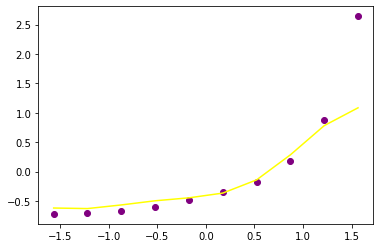

In [25]:
plt.scatter(x_scaler, y_scaler, color = 'purple')
plt.plot(x_scaler, svr_reg.predict(x_scaler), color = 'yellow')

In [20]:
print(lin_reg.predict([[6.6]]))# lin reg

[[16923.33333333]]


In [19]:
print(lin_reg2.predict(poly_reg.fit_transform([[6.6]])))# pol reg

[[8146.9948718]]


In [28]:
print(svr_reg.predict([[6.6]]))# svr reg

[0.01150915]
